In [1]:
!pip install kaggle


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 73% 119M/163M [00:00<00:00, 1.23GB/s]
100% 163M/163M [00:00<00:00, 1.06GB/s]


In [4]:
!ls

face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
#extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_933.jpg', 'with_mask_2993.jpg', 'with_mask_1919.jpg', 'with_mask_2022.jpg', 'with_mask_2640.jpg']
['with_mask_2264.jpg', 'with_mask_3673.jpg', 'with_mask_3129.jpg', 'with_mask_245.jpg', 'with_mask_3513.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2844.jpg', 'without_mask_3608.jpg', 'without_mask_3678.jpg', 'without_mask_246.jpg', 'without_mask_2111.jpg']
['without_mask_44.jpg', 'without_mask_3361.jpg', 'without_mask_541.jpg', 'without_mask_411.jpg', 'without_mask_1335.jpg']


In [10]:
print('Number of with mask images: ',len(with_mask_files))
print('Number of without mask images: ',len(without_mask_files))


Number of with mask images:  3725
Number of without mask images:  3828


**Create Labels for the two classes**

**With Mask  -->  1**

**Without Mask  -->  0**

In [14]:
#create the labels

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))

print(len(without_mask_labels))

3725
3828


In [17]:
#combine with and without mask lebels in one list

labels = with_mask_labels + withoutmask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying Images **

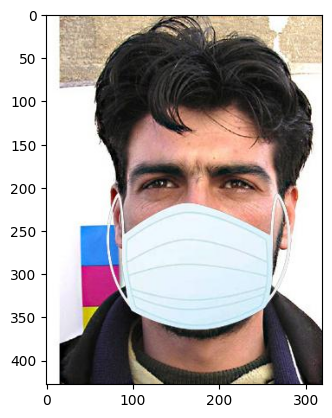

In [19]:
#display with mask image
img = mping.imread('/content/data/with_mask/with_mask_933.jpg')
implot = plt.imshow(img)
plt.show()

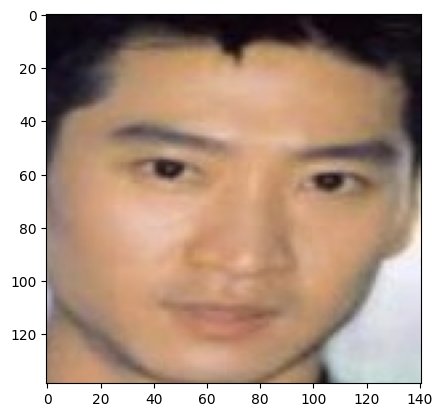

In [20]:
#display with mask image
img = mping.imread('/content/data/without_mask/without_mask_3361.jpg')
implot = plt.imshow(img)
plt.show()

**Image Pricesssing**

**Resize images**

**Convert the images into numpy arrrays**

In [23]:
#convert image into numpay array

#with mask images
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  #resize image as 128*128
  image = image.resize((128,128))
  #convert image into RGB color
  image = image.convert('RGB')
  #cinvert into numpy array
  image = np.array(image)
  data.append(image)



#without mask images

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  #resize image as 128*128
  image = image.resize((128,128))
  #convert image into RGB color
  image = image.convert('RGB')
  #cinvert into numpy array
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [24]:
type(data)

list

In [25]:
type(data[0])

numpy.ndarray

In [26]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [238, 230, 210],
        [238, 230, 214],
        [232, 223, 210]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [225, 202, 165],
        [218, 194, 160],
        [208, 183, 153]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [237, 215, 175],
        [231, 209, 171],
        [228, 206, 171]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 52,  43,  41],
        [ 40,  37,  33],
        [ 27,  28,  22]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 53,  44,  45],
        [ 41,  37,  36],
        [ 25,  24,  24]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 45,  36,  40],
        [ 35,  30,  35],
        [ 17,  16,  20]]], dtype=uint8)
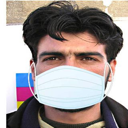

In [27]:
data[0]

In [28]:
data[0].shape

(128, 128, 3)

In [29]:
#converting image list and label into numpy array

x = np.array(data)
y = np.array(labels)

In [30]:
type(x)

numpy.ndarray

In [31]:
type(y)

numpy.ndarray

In [33]:
print(x.shape)
print(y.shape )

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
#scalling data

x_train_scaled = x_train / 255

x_test_scaled = x_test / 255

In [37]:
x_train_scaled[0]

array([[[0.32156863, 0.3254902 , 0.30588235],
        [0.30980392, 0.31372549, 0.29411765],
        [0.32156863, 0.3254902 , 0.30588235],
        ...,
        [0.38431373, 0.39607843, 0.36078431],
        [0.40392157, 0.41568627, 0.38823529],
        [0.39215686, 0.4       , 0.38039216]],

       [[0.29803922, 0.30196078, 0.28235294],
        [0.31372549, 0.31764706, 0.29803922],
        [0.3372549 , 0.34117647, 0.32156863],
        ...,
        [0.36470588, 0.37647059, 0.34117647],
        [0.36862745, 0.38039216, 0.35294118],
        [0.35294118, 0.36078431, 0.34117647]],

       [[0.32156863, 0.3254902 , 0.30588235],
        [0.28627451, 0.29019608, 0.27058824],
        [0.27843137, 0.28235294, 0.2627451 ],
        ...,
        [0.38039216, 0.39215686, 0.36470588],
        [0.36862745, 0.37647059, 0.35686275],
        [0.34901961, 0.35686275, 0.3372549 ]],

       ...,

       [[0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        [0.10980392, 0

**Building Convolutional Neural Network (CNN)**

In [39]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

#first Convolutional layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


#second Convolutional layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#flatten Layer. its conver as vector
model.add(keras.layers.Flatten())

#first dense layer
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#second dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#third dense layer
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#output layer
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [43]:
#compile the neural network

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [44]:
#training the neural network

history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 131s 758ms/step - acc: 0.6154 - loss: 0.6975 - val_acc: 0.8992 - val_loss: 0.2692
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 720ms/step - acc: 0.8543 - loss: 0.3718 - val_acc: 0.9041 - val_loss: 0.2428
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 120s 706ms/step - acc: 0.8798 - loss: 0.3143 - val_acc: 0.9174 - val_loss: 0.2227
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 703ms/step - acc: 0.9006 - loss: 0.2648 - val_acc: 0.9074 - val_loss: 0.1898
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 119s 695ms/step - acc: 0.9188 - loss: 0.2260 - val_acc: 0.9289 - val_loss: 0.1867
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 120s 706ms/step - acc: 0.9282 - loss: 0.1857 - val_acc: 0.9339 - val_loss: 0.1633
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 703ms/step - acc: 0.9455 - loss: 0.1696 - val_acc: 0.9256 - val_loss: 0.1940
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 712ms/step - acc: 0.9382 - loss: 0.1591 - val_acc: 0.9339 - val_loss: 0.1684
Epoch 9/10
170/170 ━━━━━

**Model Evaluation**

In [45]:
#test accuracy

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - acc: 0.9318 - loss: 0.2299
Test Accuracy =  0.939113199710846


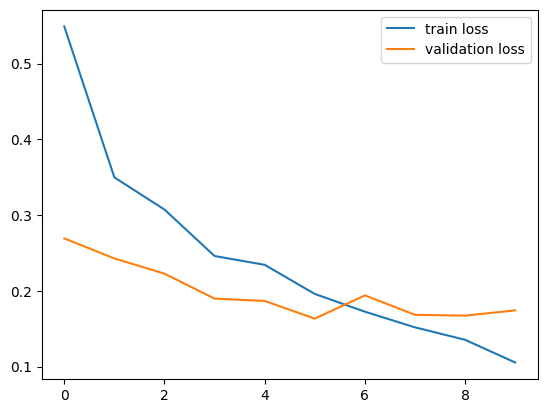

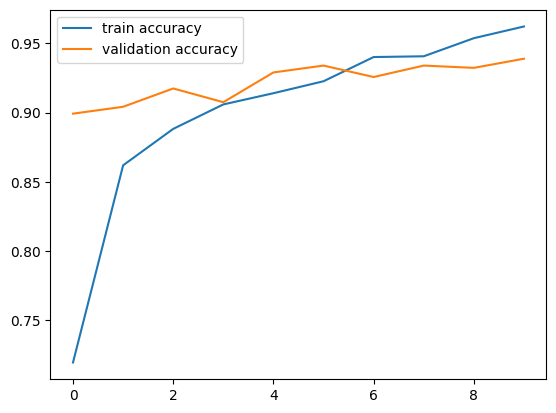

In [46]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Prediction System**

Path of the image to be predicted: /content/testImg1.jfif


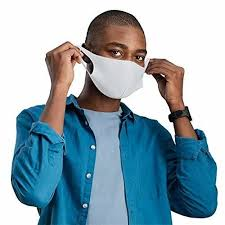

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
[[0.31177047 0.6882295 ]]
1
The person in the image is wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/testImage3.jfif


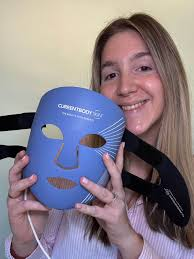

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.97335243 0.0266476 ]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

**Save a train Pickle file**

In [50]:
import pickle

# ... (your existing code) ...

# After training the model (after model.fit)
with open('Face_Mask_Detection.pkl', 'wb') as file:
  pickle.dump(model, file)

print("Model saved as Face_Mask_Detection_model.pkl")

Model saved as Face_Mask_Detection_model.pkl
